In [15]:
!pip install numpy
!pip install pandas
!pip install xgboost

In [16]:
import numpy as np
import pandas as pd


In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
data = pd.read_csv('/content/drive/MyDrive/cardio.csv')

In [83]:
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,NaN,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,NaN,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,NaN,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,NaN,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,NaN,56.0,100,60,1,1,0,0,0,0


In [ ]:
data['cardio'].unique()

array([0, 1])

In [ ]:
data.std()

,0
id,28851.302323
age,2467.251667
gender,0.476838
height,8.210102
weight,14.395757
ap_hi,154.011419
ap_lo,188.472530
cholesterol,0.680250
gluc,0.572270
smoke,0.283484


In [ ]:
data.keys()

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [84]:
data.isnull().sum()

,0
id,0
age,0
gender,0
height,9
weight,0
ap_hi,0
ap_lo,0
cholesterol,0
gluc,0
smoke,0


In [19]:
data['height'].fillna(data['height'].mean(), inplace=True)

<ipython-input-19-a3b752b6b5f4>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['height'].fillna(data['height'].mean(), inplace=True)


In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_s= scaler.fit_transform(data)
print(data)
sc_data = pd.DataFrame(data_s,columns=data.columns)
sc_data.head()

          id    age  gender      height  weight  ap_hi  ap_lo  cholesterol  \
0          0  18393       2  164.359532    62.0    110     80            1   
1          1  20228       1  164.359532    85.0    140     90            3   
2          2  18857       1  164.359532    64.0    130     70            3   
3          3  17623       2  164.359532    82.0    150    100            1   
4          4  17474       1  164.359532    56.0    100     60            1   
...      ...    ...     ...         ...     ...    ...    ...          ...   
69995  99993  19240       2  168.000000    76.0    120     80            1   
69996  99995  22601       1  158.000000   126.0    140     90            2   
69997  99996  19066       2  183.000000   105.0    180     90            3   
69998  99998  22431       1  163.000000    72.0    135     80            1   
69999  99999  20540       1  170.000000    72.0    120     80            2   

       gluc  smoke  alco  active  cardio  
0         1      0  

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,-1.732080,-0.436062,1.364055,0.0,-0.847873,-0.122182,-0.088238,-0.539322,-0.39572,-0.310879,-0.238384,0.494167,-0.9994
1,-1.732046,0.307686,-0.733108,0.0,0.749831,0.072610,-0.035180,2.400793,-0.39572,-0.310879,-0.238384,0.494167,1.0006
2,-1.732011,-0.247997,-0.733108,0.0,-0.708942,0.007679,-0.141297,2.400793,-0.39572,-0.310879,-0.238384,-2.023607,1.0006
3,-1.731976,-0.748152,1.364055,0.0,0.541435,0.137541,0.017879,-0.539322,-0.39572,-0.310879,-0.238384,0.494167,1.0006
4,-1.731942,-0.808543,-0.733108,0.0,-1.264666,-0.187113,-0.194356,-0.539322,-0.39572,-0.310879,-0.238384,-2.023607,-0.9994


In [22]:
from sklearn.preprocessing import Normalizer
scaler = Normalizer()
data_s= scaler.fit_transform(data)
print(data)
sc_data = pd.DataFrame(data_s,columns=data.columns)
sc_data.head()


          id    age  gender      height  weight  ap_hi  ap_lo  cholesterol  \
0          0  18393       2  164.359532    62.0    110     80            1   
1          1  20228       1  164.359532    85.0    140     90            3   
2          2  18857       1  164.359532    64.0    130     70            3   
3          3  17623       2  164.359532    82.0    150    100            1   
4          4  17474       1  164.359532    56.0    100     60            1   
...      ...    ...     ...         ...     ...    ...    ...          ...   
69995  99993  19240       2  168.000000    76.0    120     80            1   
69996  99995  22601       1  158.000000   126.0    140     90            2   
69997  99996  19066       2  183.000000   105.0    180     90            3   
69998  99998  22431       1  163.000000    72.0    135     80            1   
69999  99999  20540       1  170.000000    72.0    120     80            2   

       gluc  smoke  alco  active  cardio  
0         1      0  

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0.000000,0.999927,0.000109,0.008935,0.003371,0.005980,0.004349,0.000054,0.000054,0.0,0.0,0.000054,0.000000
1,0.000049,0.999924,0.000049,0.008125,0.004202,0.006921,0.004449,0.000148,0.000049,0.0,0.0,0.000049,0.000049
2,0.000106,0.999926,0.000053,0.008715,0.003394,0.006893,0.003712,0.000159,0.000053,0.0,0.0,0.000000,0.000053
3,0.000170,0.999893,0.000113,0.009325,0.004653,0.008511,0.005674,0.000057,0.000057,0.0,0.0,0.000057,0.000057
4,0.000229,0.999928,0.000057,0.009405,0.003205,0.005722,0.003433,0.000057,0.000057,0.0,0.0,0.000000,0.000000


In [23]:
from sklearn.model_selection import train_test_split
x = data.drop('cardio', axis=1)
y = data['cardio']

In [24]:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import mutual_info_classif
from sklearn.svm import SVC
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3, 4]
}
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=3)
grid.fit(sc_data, y)
grid.best_params_

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
model = SVC(kernel='rbf', C=0.1 , gamma= 1 )
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)



In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import mutual_info_classif
from sklearn.linear_model import LogisticRegression
param_grid = {'C':[0.1, 1.1,1, 10, 100], 'penalty':['l1','l2'], 'tol':[1e-4,1e-3,1e-2,1e-1]}
grid = GridSearchCV(LogisticRegression(), param_grid, refit=True, verbose=3)
grid.fit(sc_data, y)
grid.best_params_

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV 1/5] END .......C=0.1, penalty=l1, tol=0.0001;, score=nan total time=   0.0s
[CV 2/5] END .......C=0.1, penalty=l1, tol=0.0001;, score=nan total time=   0.0s
[CV 3/5] END .......C=0.1, penalty=l1, tol=0.0001;, score=nan total time=   0.0s
[CV 4/5] END .......C=0.1, penalty=l1, tol=0.0001;, score=nan total time=   0.0s
[CV 5/5] END .......C=0.1, penalty=l1, tol=0.0001;, score=nan total time=   0.0s
[CV 1/5] END ........C=0.1, penalty=l1, tol=0.001;, score=nan total time=   0.0s
[CV 2/5] END ........C=0.1, penalty=l1, tol=0.001;, score=nan total time=   0.0s
[CV 3/5] END ........C=0.1, penalty=l1, tol=0.001;, score=nan total time=   0.0s
[CV 4/5] END ........C=0.1, penalty=l1, tol=0.001;, score=nan total time=   0.0s
[CV 5/5] END ........C=0.1, penalty=l1, tol=0.001;, score=nan total time=   0.0s
[CV 1/5] END .........C=0.1, penalty=l1, tol=0.01;, score=nan total time=   0.0s
[CV 2/5] END .........C=0.1, penalty=l1, tol=0.

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
100 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1193, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "

{'C': 100, 'penalty': 'l2', 'tol': 0.0001}

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
model = LogisticRegression(C= 100, penalty='l2', tol=0.0001, random_state=42)

lr_class = model.fit(x_train, y_train)

lr_pred = lr_class.predict(x_test)
cm = confusion_matrix(y_test, lr_pred)
print("Confusion Matrix:")
print(cm)

print("\nClassification Report:")
print(classification_report(y_test, lr_pred))

Confusion Matrix:
[[5043 1868]
 [2454 4635]]

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.73      0.70      6911
           1       0.71      0.65      0.68      7089

    accuracy                           0.69     14000
   macro avg       0.69      0.69      0.69     14000
weighted avg       0.69      0.69      0.69     14000



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


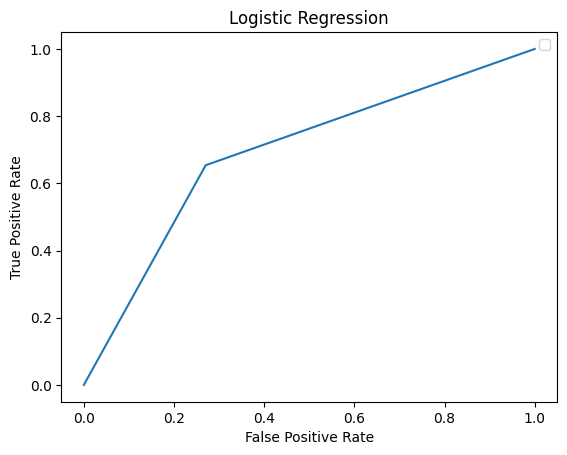

In [ ]:
from sklearn import metrics
fpr , tpr , thresholds = metrics.roc_curve(y_test, lr_pred)
import matplotlib.pyplot as plt
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression')
plt.legend()
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
param_grid = {'n_estimators':[10,20,50,100,150,200], 'criterion':['gini', 'entropy', 'log_loss'] }
grid = GridSearchCV(RandomForestClassifier(), param_grid, refit=True, verbose=3)
grid.fit(sc_data, y)
grid.best_params_

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5] END ...criterion=gini, n_estimators=10;, score=1.000 total time=   1.5s
[CV 2/5] END ...criterion=gini, n_estimators=10;, score=1.000 total time=   1.1s
[CV 3/5] END ...criterion=gini, n_estimators=10;, score=1.000 total time=   1.5s
[CV 4/5] END ...criterion=gini, n_estimators=10;, score=1.000 total time=   0.9s
[CV 5/5] END ...criterion=gini, n_estimators=10;, score=1.000 total time=   0.6s
[CV 1/5] END ...criterion=gini, n_estimators=20;, score=1.000 total time=   1.6s
[CV 2/5] END ...criterion=gini, n_estimators=20;, score=1.000 total time=   1.9s
[CV 3/5] END ...criterion=gini, n_estimators=20;, score=1.000 total time=   2.1s
[CV 4/5] END ...criterion=gini, n_estimators=20;, score=1.000 total time=   2.2s
[CV 5/5] END ...criterion=gini, n_estimators=20;, score=1.000 total time=   1.7s
[CV 1/5] END ...criterion=gini, n_estimators=50;, score=1.000 total time=   4.3s
[CV 2/5] END ...criterion=gini, n_estimators=50;

{'criterion': 'gini', 'n_estimators': 10}

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

model = RandomForestClassifier(n_estimators=10, criterion= 'gini', random_state=42)

rf_class = model.fit(x_train, y_train)
rf_pred = rf_class.predict(x_test)
cm = confusion_matrix(y_test, rf_pred)
print("Confusion Matrix:")
print(cm)

print("\nClassification Report:")
print(classification_report(y_test, rf_pred))

Confusion Matrix:
[[5270 1641]
 [2512 4577]]

Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.76      0.72      6911
           1       0.74      0.65      0.69      7089

    accuracy                           0.70     14000
   macro avg       0.71      0.70      0.70     14000
weighted avg       0.71      0.70      0.70     14000



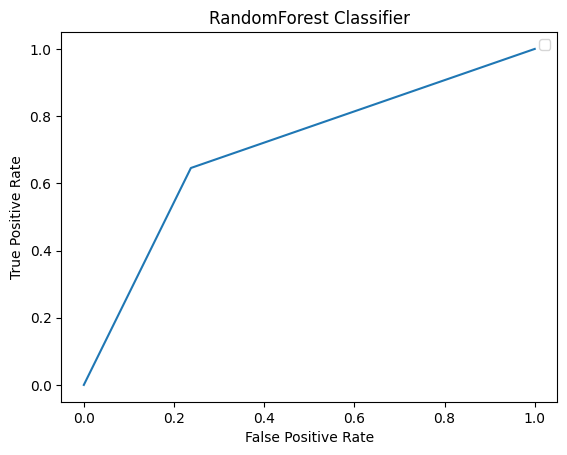

In [ ]:
from sklearn import metrics
fpr , tpr , thresholds = metrics.roc_curve(y_test, rf_pred)
import matplotlib.pyplot as plt
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RandomForest Classifier')
plt.legend()
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
param_grid = {'criterion':['gini', 'entropy', 'log_loss'], 'splitter':[ 'random','best']}
grid = GridSearchCV(DecisionTreeClassifier(), param_grid, refit=True, verbose=3)
grid.fit(sc_data, y)
grid.best_params_

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END ...criterion=gini, splitter=random;, score=1.000 total time=   0.0s
[CV 2/5] END ...criterion=gini, splitter=random;, score=1.000 total time=   0.0s
[CV 3/5] END ...criterion=gini, splitter=random;, score=1.000 total time=   0.0s
[CV 4/5] END ...criterion=gini, splitter=random;, score=1.000 total time=   0.0s
[CV 5/5] END ...criterion=gini, splitter=random;, score=1.000 total time=   0.0s
[CV 1/5] END .....criterion=gini, splitter=best;, score=1.000 total time=   0.1s
[CV 2/5] END .....criterion=gini, splitter=best;, score=1.000 total time=   0.1s
[CV 3/5] END .....criterion=gini, splitter=best;, score=1.000 total time=   0.1s
[CV 4/5] END .....criterion=gini, splitter=best;, score=1.000 total time=   0.1s
[CV 5/5] END .....criterion=gini, splitter=best;, score=1.000 total time=   0.2s
[CV 1/5] END criterion=entropy, splitter=random;, score=1.000 total time=   0.0s
[CV 2/5] END criterion=entropy, splitter=random;,

{'criterion': 'gini', 'splitter': 'random'}

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='gini', splitter='random', random_state=42)
dt_class = model.fit(x_train, y_train)
dt_pred = dt_class.predict(x_test)
cm = confusion_matrix(y_test, dt_pred)
print("Confusion Matrix:")
print(cm)

print("\nClassification Report:")
print(classification_report(y_test, dt_pred))

Confusion Matrix:
[[4400 2511]
 [2602 4487]]

Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.64      0.63      6911
           1       0.64      0.63      0.64      7089

    accuracy                           0.63     14000
   macro avg       0.63      0.63      0.63     14000
weighted avg       0.63      0.63      0.63     14000



In [ ]:
from sklearn import metrics
fpr , tpr , thresholds = metrics.roc_curve(y_test, dt_pred)


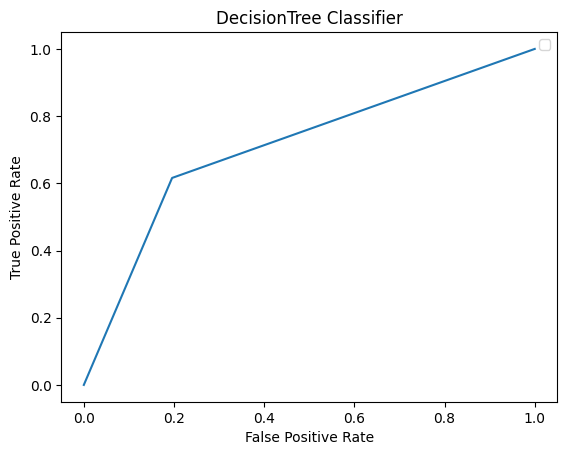

In [ ]:
import matplotlib.pyplot as plt
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('DecisionTree Classifier')
plt.legend()
plt.show()

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
param_grid = {'n_estimators':[10,20,50,100], 'learning_rate':[0.01, 0.1, 1, 10]}
grid = GridSearchCV(AdaBoostClassifier(), param_grid, refit=True, verbose=3)
grid.fit(sc_data, y)
grid.best_params_


Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END learning_rate=0.01, n_estimators=10;, score=1.000 total time=   0.2s
[CV 2/5] END learning_rate=0.01, n_estimators=10;, score=1.000 total time=   0.2s
[CV 3/5] END learning_rate=0.01, n_estimators=10;, score=1.000 total time=   0.2s
[CV 4/5] END learning_rate=0.01, n_estimators=10;, score=1.000 total time=   0.2s
[CV 5/5] END learning_rate=0.01, n_estimators=10;, score=1.000 total time=   0.2s
[CV 1/5] END learning_rate=0.01, n_estimators=20;, score=1.000 total time=   0.2s
[CV 2/5] END learning_rate=0.01, n_estimators=20;, score=1.000 total time=   0.2s
[CV 3/5] END learning_rate=0.01, n_estimators=20;, score=1.000 total time=   0.4s
[CV 4/5] END learning_rate=0.01, n_estimators=20;, score=1.000 total time=   0.5s
[CV 5/5] END learning_rate=0.01, n_estimators=20;, score=1.000 total time=   0.3s
[CV 1/5] END learning_rate=0.01, n_estimators=50;, score=1.000 total time=   0.2s
[CV 2/5] END learning_rate=0.01, n_es

{'learning_rate': 0.01, 'n_estimators': 10}

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
model = AdaBoostClassifier(n_estimators=10, learning_rate=0.01, random_state=42)
ada_class = model.fit(x_train, y_train)
ada_pred = ada_class.predict(x_test)
cm = confusion_matrix(y_test, ada_pred)
print("Confusion Matrix:")
print(cm)

print("\nClassification Report:")
print(classification_report(y_test, ada_pred))


Confusion Matrix:
[[5558 1353]
 [2722 4367]]

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.80      0.73      6911
           1       0.76      0.62      0.68      7089

    accuracy                           0.71     14000
   macro avg       0.72      0.71      0.71     14000
weighted avg       0.72      0.71      0.71     14000



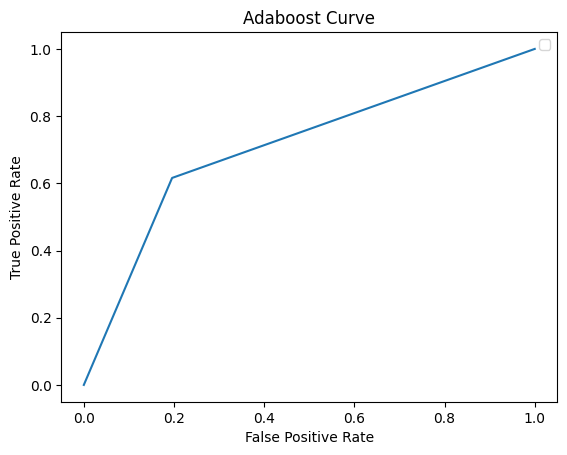

In [ ]:
import matplotlib.pyplot as plt
from sklearn import metrics
fpr , tpr , thresholds = metrics.roc_curve(y_test, ada_pred)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Adaboost Curve')
plt.legend()
plt.show()

In [69]:
from sklearn.naive_bayes import GaussianNB
param_grid = {'var_smoothing': [1e-12,1e-10,1e-9, 1e-8, 1e-7, 1e-6]}
grid = GridSearchCV(GaussianNB(), param_grid, refit=True, verbose=3)
grid.fit(sc_data, y)
grid.best_params_

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END ...............var_smoothing=1e-12;, score=0.819 total time=   0.1s
[CV 2/5] END ...............var_smoothing=1e-12;, score=0.998 total time=   0.0s
[CV 3/5] END ...............var_smoothing=1e-12;, score=0.998 total time=   0.0s
[CV 4/5] END ...............var_smoothing=1e-12;, score=0.999 total time=   0.1s
[CV 5/5] END ...............var_smoothing=1e-12;, score=1.000 total time=   0.1s
[CV 1/5] END ...............var_smoothing=1e-10;, score=0.745 total time=   0.1s
[CV 2/5] END ...............var_smoothing=1e-10;, score=0.997 total time=   0.1s
[CV 3/5] END ...............var_smoothing=1e-10;, score=0.998 total time=   0.1s
[CV 4/5] END ...............var_smoothing=1e-10;, score=0.999 total time=   0.1s
[CV 5/5] END ...............var_smoothing=1e-10;, score=1.000 total time=   0.1s
[CV 1/5] END ...............var_smoothing=1e-09;, score=0.665 total time=   0.1s
[CV 2/5] END ...............var_smoothing=1e-09;,

{'var_smoothing': 1e-12}

In [70]:
model = GaussianNB(var_smoothing=1e-12)
nb_class = model.fit(x_train, y_train)
nb_pred = nb_class.predict(x_test)
cm = confusion_matrix(y_test, nb_pred)
print("Confusion Matrix:")
print(cm)

print("\nClassification Report:")
print(classification_report(y_test, nb_pred))

Confusion Matrix:
[[6207  704]
 [5159 1930]]

Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.90      0.68      6911
           1       0.73      0.27      0.40      7089

    accuracy                           0.58     14000
   macro avg       0.64      0.59      0.54     14000
weighted avg       0.64      0.58      0.54     14000



In [71]:
from sklearn.neighbors import KNeighborsClassifier
param_grid = {'n_neighbors':[1,2,3,4,5,6,7,8,9,10], 'weights':['uniform', 'distance'], 'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, refit=True, verbose=3)
grid.fit(sc_data, y)
grid.best_params_

Fitting 5 folds for each of 80 candidates, totalling 400 fits
[CV 1/5] END algorithm=auto, n_neighbors=1, weights=uniform;, score=0.498 total time=   1.0s
[CV 2/5] END algorithm=auto, n_neighbors=1, weights=uniform;, score=0.519 total time=   0.9s
[CV 3/5] END algorithm=auto, n_neighbors=1, weights=uniform;, score=0.531 total time=   1.1s
[CV 4/5] END algorithm=auto, n_neighbors=1, weights=uniform;, score=0.545 total time=   1.0s
[CV 5/5] END algorithm=auto, n_neighbors=1, weights=uniform;, score=0.531 total time=   0.9s
[CV 1/5] END algorithm=auto, n_neighbors=1, weights=distance;, score=0.498 total time=   0.3s
[CV 2/5] END algorithm=auto, n_neighbors=1, weights=distance;, score=0.519 total time=   0.3s
[CV 3/5] END algorithm=auto, n_neighbors=1, weights=distance;, score=0.531 total time=   0.5s
[CV 4/5] END algorithm=auto, n_neighbors=1, weights=distance;, score=0.545 total time=   0.4s
[CV 5/5] END algorithm=auto, n_neighbors=1, weights=distance;, score=0.531 total time=   0.3s
[CV

{'algorithm': 'auto', 'n_neighbors': 6, 'weights': 'distance'}

In [72]:
model = KNeighborsClassifier(n_neighbors=6, weights='distance', algorithm='auto')
knn_class = model.fit(x_train, y_train)
knn_pred = knn_class.predict(x_test)
cm = confusion_matrix(y_test, knn_pred)
print("Confusion Matrix:")
print(cm)

print("\nClassification Report:")
print(classification_report(y_test, knn_pred))

Confusion Matrix:
[[3914 2997]
 [3199 3890]]

Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.57      0.56      6911
           1       0.56      0.55      0.56      7089

    accuracy                           0.56     14000
   macro avg       0.56      0.56      0.56     14000
weighted avg       0.56      0.56      0.56     14000



In [74]:
from sklearn.ensemble import GradientBoostingClassifier
param_grid = {
    'n_estimators': [10, 20, 50, 100],
    'learning_rate': [0.01, 0.1, 1],
    'criterion': ['friedman_mse', 'squared_error']

}
grid = GridSearchCV(GradientBoostingClassifier(), param_grid, refit=True, verbose=3)
grid.fit(sc_data, y)
grid.best_params_

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END criterion=friedman_mse, learning_rate=0.01, n_estimators=10;, score=1.000 total time=   1.9s
[CV 2/5] END criterion=friedman_mse, learning_rate=0.01, n_estimators=10;, score=1.000 total time=   1.9s
[CV 3/5] END criterion=friedman_mse, learning_rate=0.01, n_estimators=10;, score=1.000 total time=   1.9s
[CV 4/5] END criterion=friedman_mse, learning_rate=0.01, n_estimators=10;, score=1.000 total time=   2.3s
[CV 5/5] END criterion=friedman_mse, learning_rate=0.01, n_estimators=10;, score=1.000 total time=   2.6s
[CV 1/5] END criterion=friedman_mse, learning_rate=0.01, n_estimators=20;, score=1.000 total time=   4.0s
[CV 2/5] END criterion=friedman_mse, learning_rate=0.01, n_estimators=20;, score=1.000 total time=   4.3s
[CV 3/5] END criterion=friedman_mse, learning_rate=0.01, n_estimators=20;, score=1.000 total time=   5.1s
[CV 4/5] END criterion=friedman_mse, learning_rate=0.01, n_estimators=20;, score=1.000 tot

{'criterion': 'friedman_mse', 'learning_rate': 0.01, 'n_estimators': 10}

In [26]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
model = GradientBoostingClassifier(n_estimators=10, learning_rate=0.01, criterion='friedman_mse', random_state=42)
gb_class = model.fit(x_train, y_train)
gb_pred = gb_class.predict(x_test)
cm = confusion_matrix(y_test, gb_pred)
print("Confusion Matrix:")
print(cm)

print("\nClassification Report:")
print(classification_report(y_test, gb_pred))

Confusion Matrix:
[[5355 1565]
 [2284 4796]]

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.77      0.74      6920
           1       0.75      0.68      0.71      7080

    accuracy                           0.73     14000
   macro avg       0.73      0.73      0.72     14000
weighted avg       0.73      0.73      0.72     14000



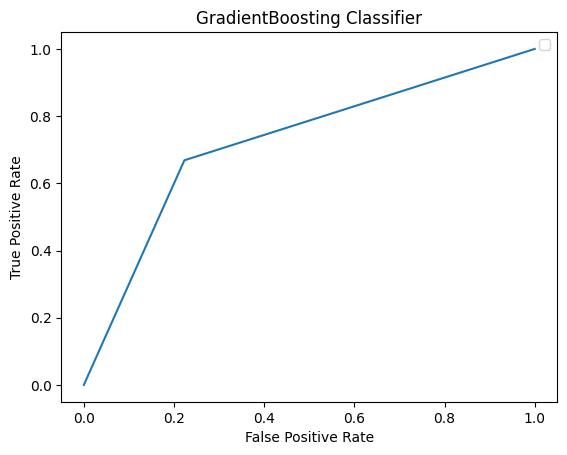

In [76]:
fpr , tpr , thresholds = metrics.roc_curve(y_test, gb_pred)
import matplotlib.pyplot as plt
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('GradientBoosting Classifier')
plt.legend()
plt.show()

In [27]:
import pickle
model_filename = '/content/gradient_boosting_model.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(model, file)

print(f"Model saved as {model_filename}")
from google.colab import files
files.download(model_filename)


Model saved as /content/gradient_boosting_model.pkl


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>